## Atlantic Trading Volatility Summary

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code toggle"></form>''')

In [2]:
import project_path

In [3]:
#backend modules
from configuration import ConfigurationFactory
from service.registry import RegistryManager
from service.log import LogService
from model.dbmodel import DatabaseService, ShortEndDatabaseManager
from analysis.analytics import DataAnalyticsService
from matplotlib.backends.backend_gtk3agg import FigureCanvasGTK3Agg as FigureCanvas
from model.payload import TODAY_STR, YEAR_PRIOR_STR, YEAR_3_PRIOR_STR


# Interactive charting
#import plotly.plotly as py
import pprint
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=False)


#front end modules
%matplotlib inline
from model.payload import payloads
from graph.graph import Lineplot, Scatterplot, Heatplot, ColorbarPlot, Barplot, Histplot

In [4]:
%%capture
#configuration
config = ConfigurationFactory.create_config()

#initialise all of the services
log_serv = LogService(config["system"]["log"])
db_serv = DatabaseService(config["system"]["db"])
analytics = DataAnalyticsService()

#start all services
log_serv.start()
db_serv.start()
analytics.start()

In [5]:
#process payload and create datamodel (temp)
datamodel = {}
for plid, pl in payloads.items():
    pl.add_db_source(db_serv)
    datamodel[plid] = analytics.gen_plot_datamodel(payloads[plid])

#custom datamodels
stl_interp_delta_model = analytics.get_weekly_interp_change(payloads["p1"])
ebor_interp_delta_model = analytics.get_weekly_interp_change(payloads["p4"])
le_interp_delta_model = analytics.get_weekly_interp_change(payloads["p7"])

#multimodel
stl_multi_model = analytics.gen_multi_datamodel(payloads["p1"])
ebor_multi_model = analytics.gen_multi_datamodel(payloads["p4"])
le_multi_model = analytics.gen_multi_datamodel(payloads["p7"])

## Short Sterling Vol Summary (2016-07-17-2019-07-17)

### 1W/1M Summary

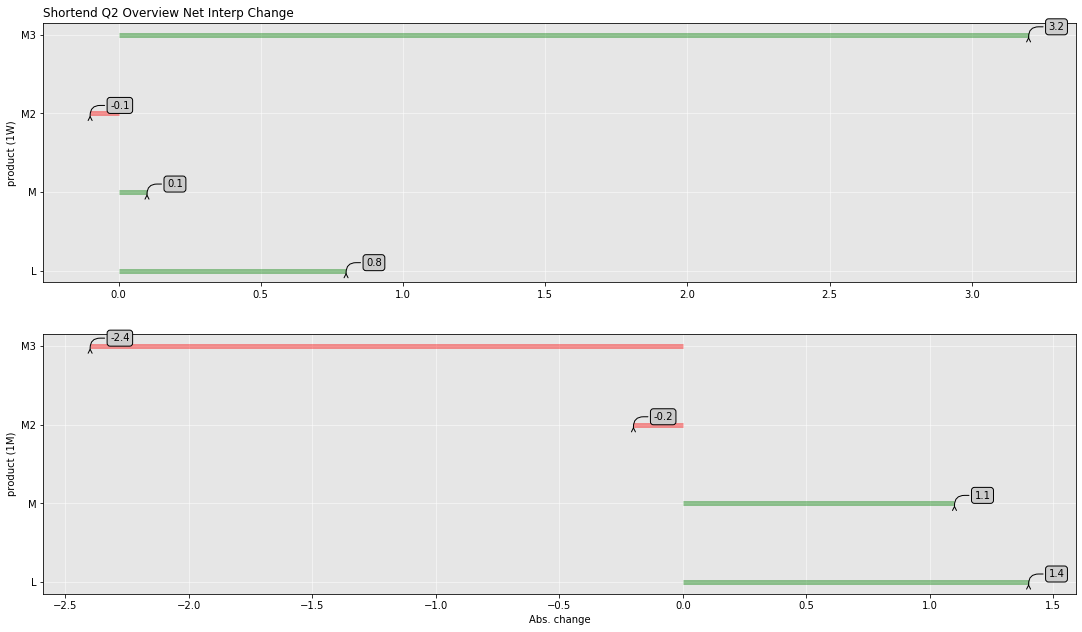

In [6]:
#interp overview
bar = Barplot(stl_interp_delta_model)
bar.figure.set_size_inches(18.5, 10.5)
display(bar.figure)

### Bucket Overview

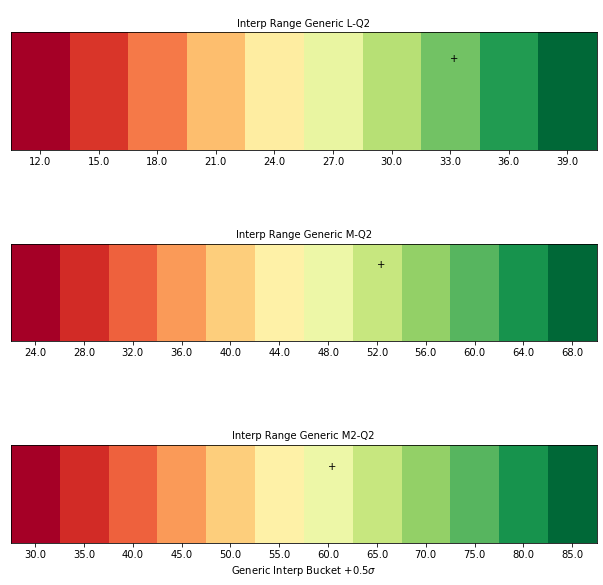

In [7]:
#colorbar overview
cbar = ColorbarPlot(stl_multi_model)
cbar.figure.set_size_inches(10.5, 10.5)
display(cbar.figure)

### L Q2

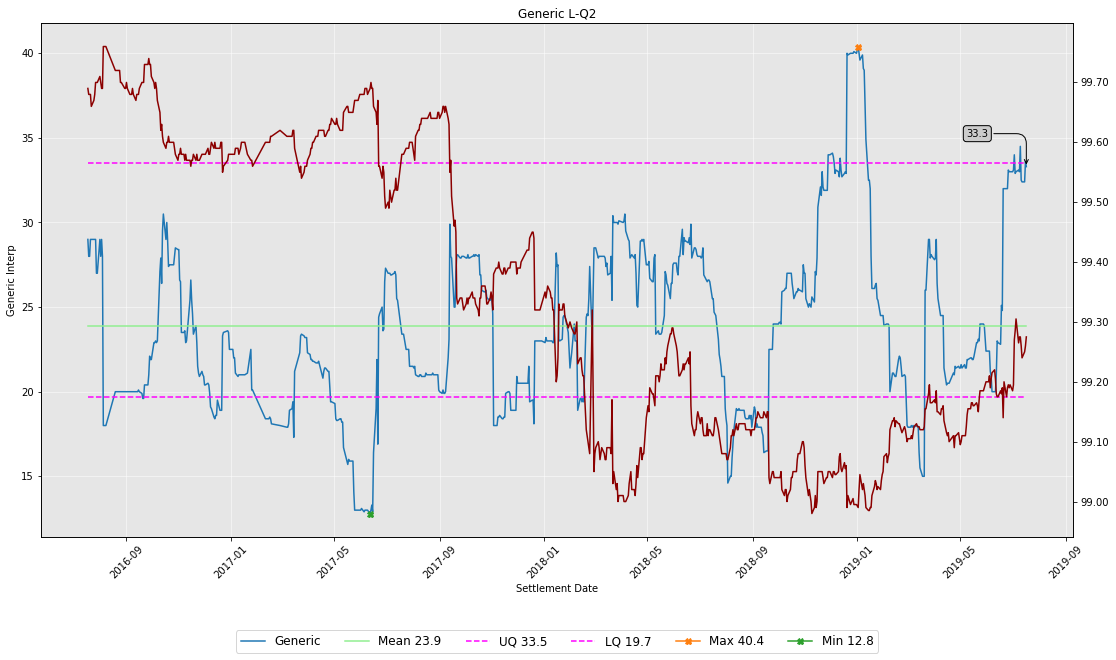

In [8]:
#Lineplot
line = Lineplot(datamodel["p1"])
line.figure.set_size_inches(18.5, 10.5)
display(line.figure)

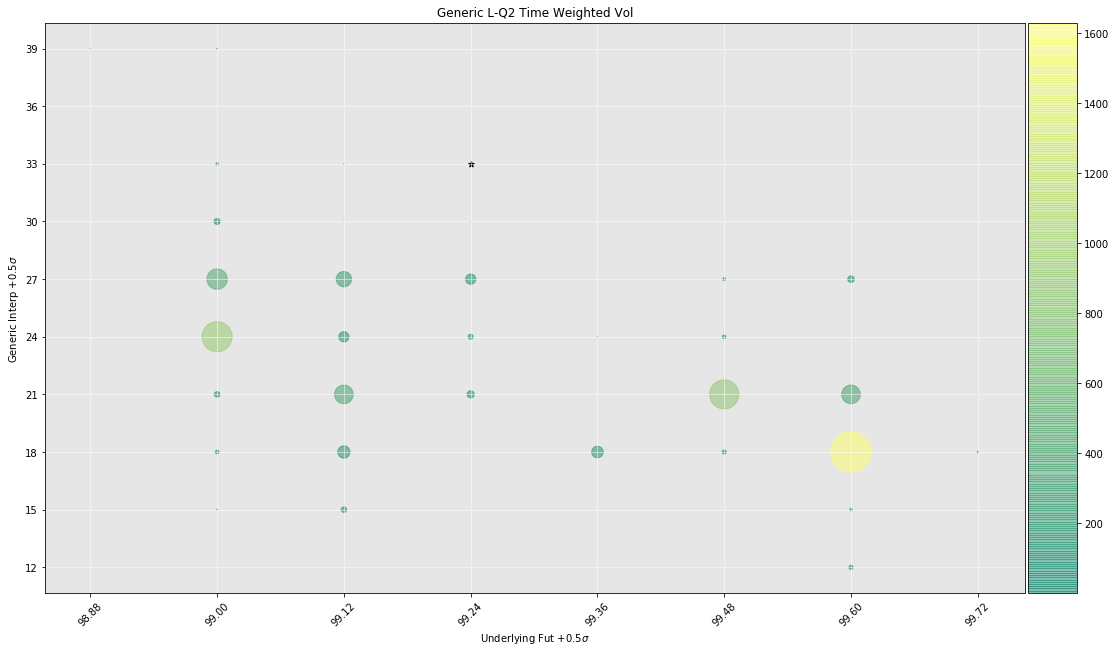

In [9]:
#Scatterplot
scat = Scatterplot(datamodel["p1"])
scat.figure.set_size_inches(18.5, 10.5)
display(scat.figure)

### M Q2

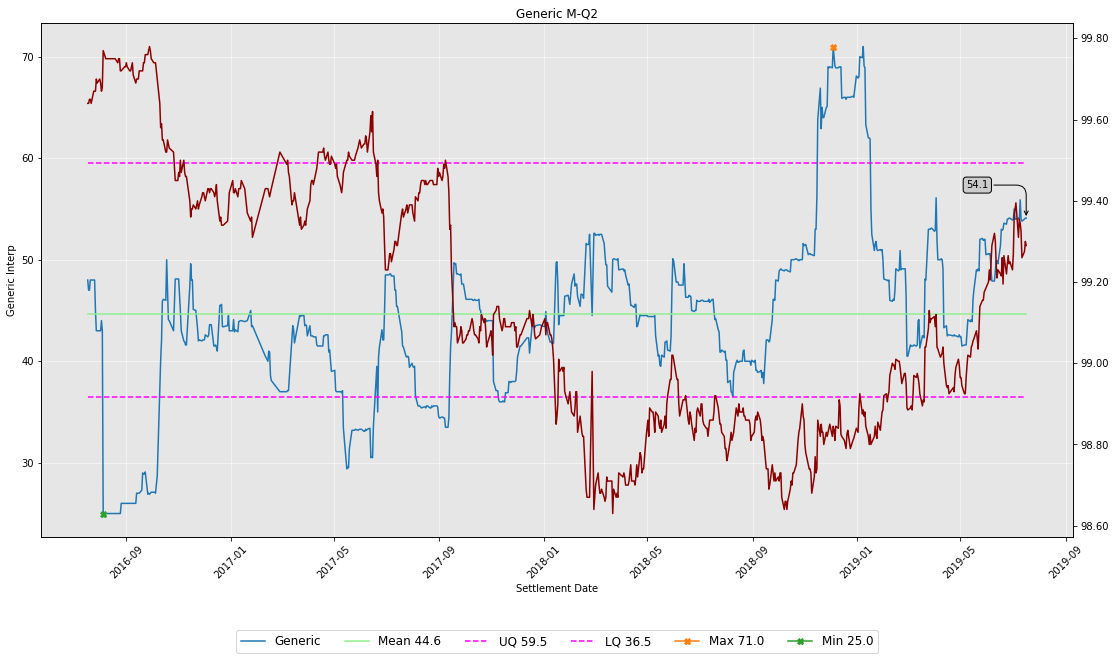

In [10]:
#Lineplot
line = Lineplot(datamodel["p2"])
line.figure.set_size_inches(18.5, 10.5)
display(line.figure)

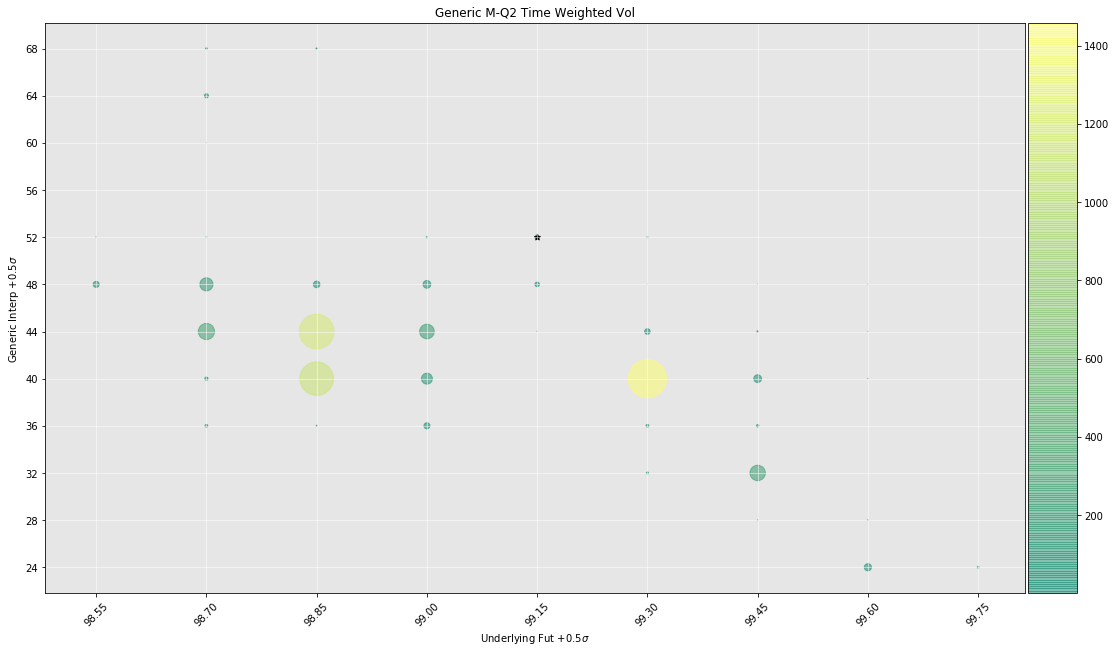

In [11]:
#Scatterplot
scat = Scatterplot(datamodel["p2"])
scat.figure.set_size_inches(18.5, 10.5)
display(scat.figure)

### M2 Q2

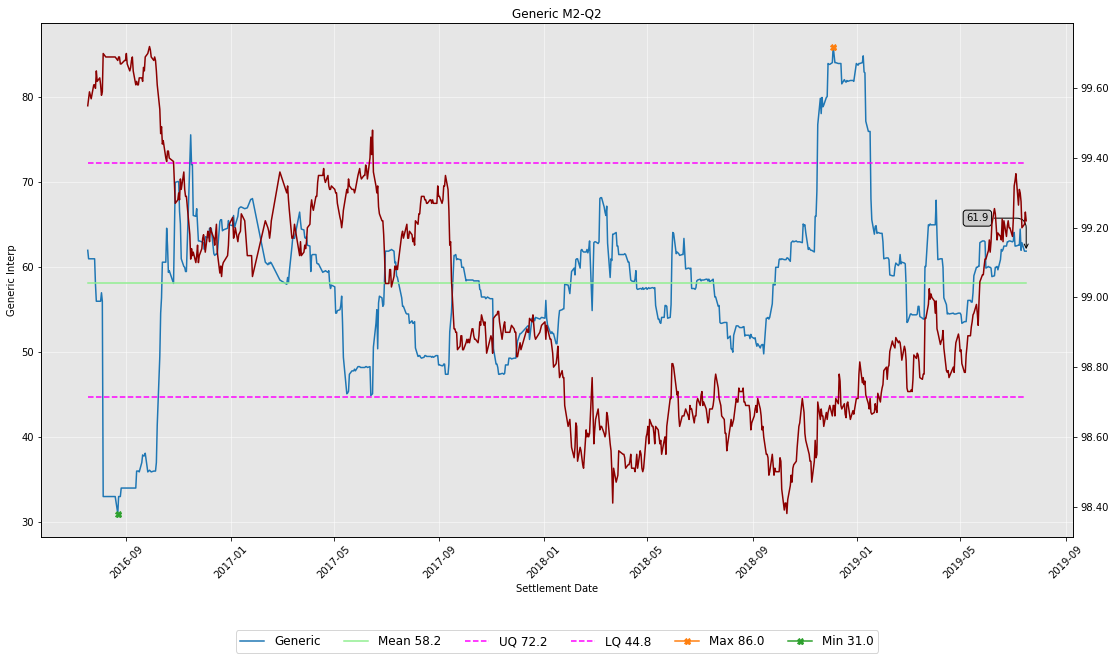

In [12]:
#Lineplot
line = Lineplot(datamodel["p3"])
line.figure.set_size_inches(18.5, 10.5)
display(line.figure)

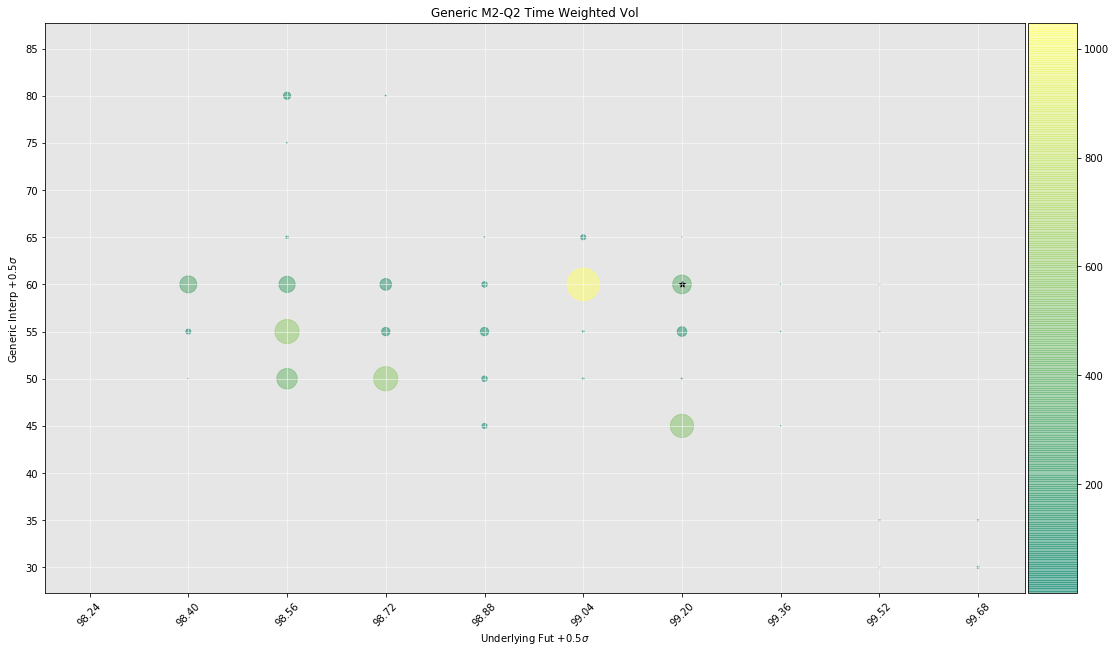

In [13]:
#Scatterplot
scat = Scatterplot(datamodel["p3"])
scat.figure.set_size_inches(18.5, 10.5)
display(scat.figure)

## Euribor Vol Summary (2016-07-17-2019-07-17)

### 1W/1M Summary

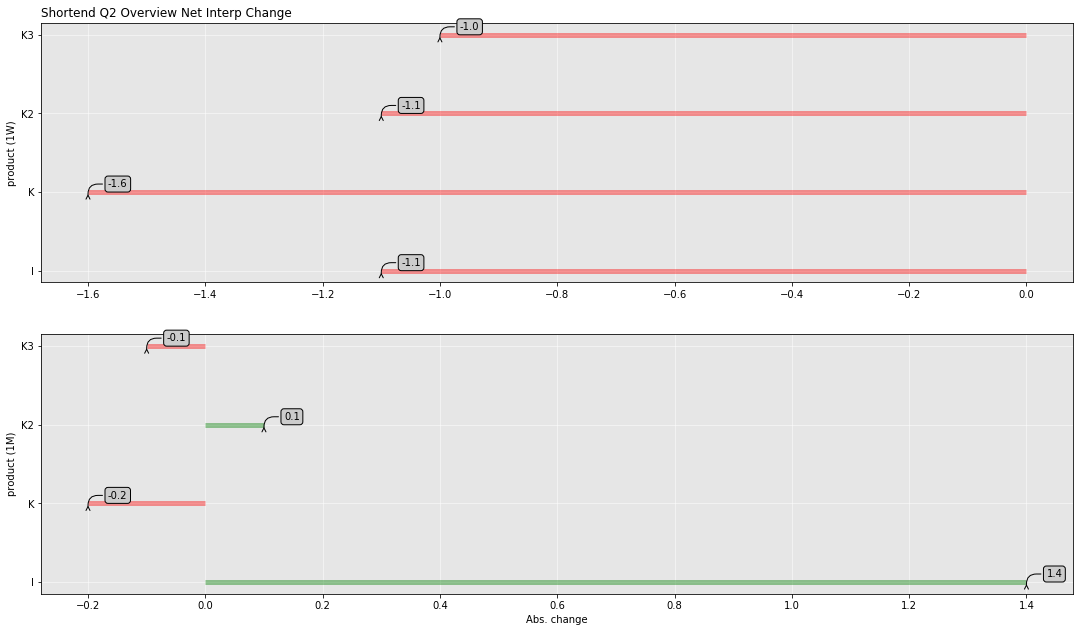

In [14]:
#interp overview
bar = Barplot(ebor_interp_delta_model)
bar.figure.set_size_inches(18.5, 10.5)
display(bar.figure)

### Bucket Overview

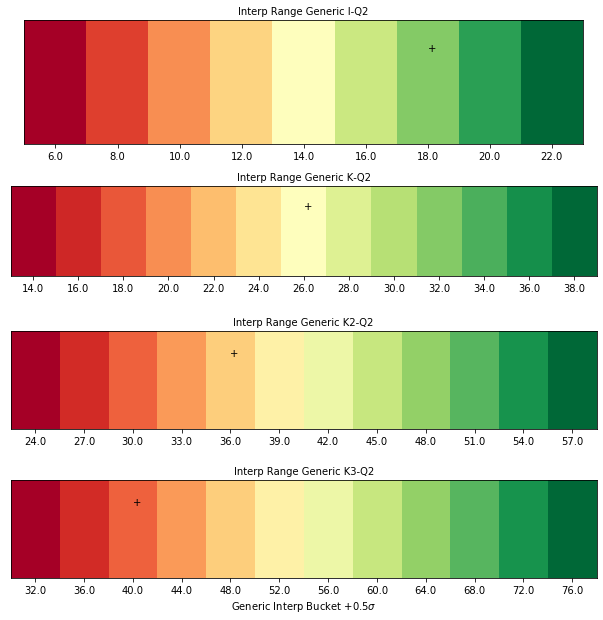

In [15]:
#colorbar overview
cbar = ColorbarPlot(ebor_multi_model)
cbar.figure.set_size_inches(10.5, 10.5)
display(cbar.figure)

### I Q2

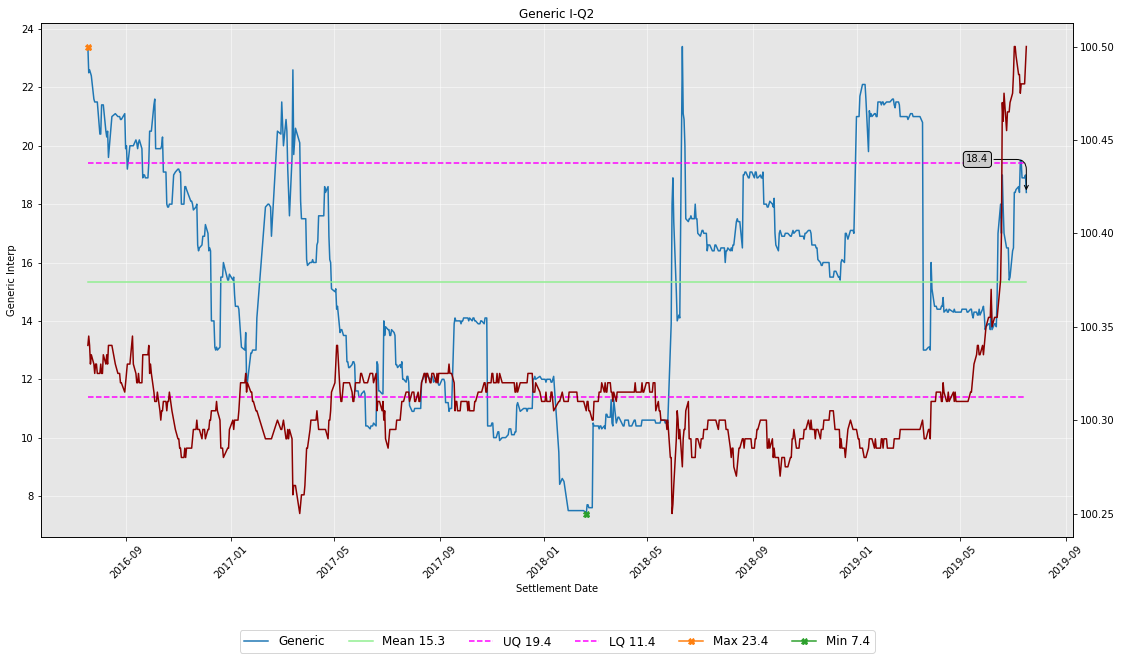

In [16]:
#Lineplot
line = Lineplot(datamodel["p4"])
line.figure.set_size_inches(18.5, 10.5)
display(line.figure)

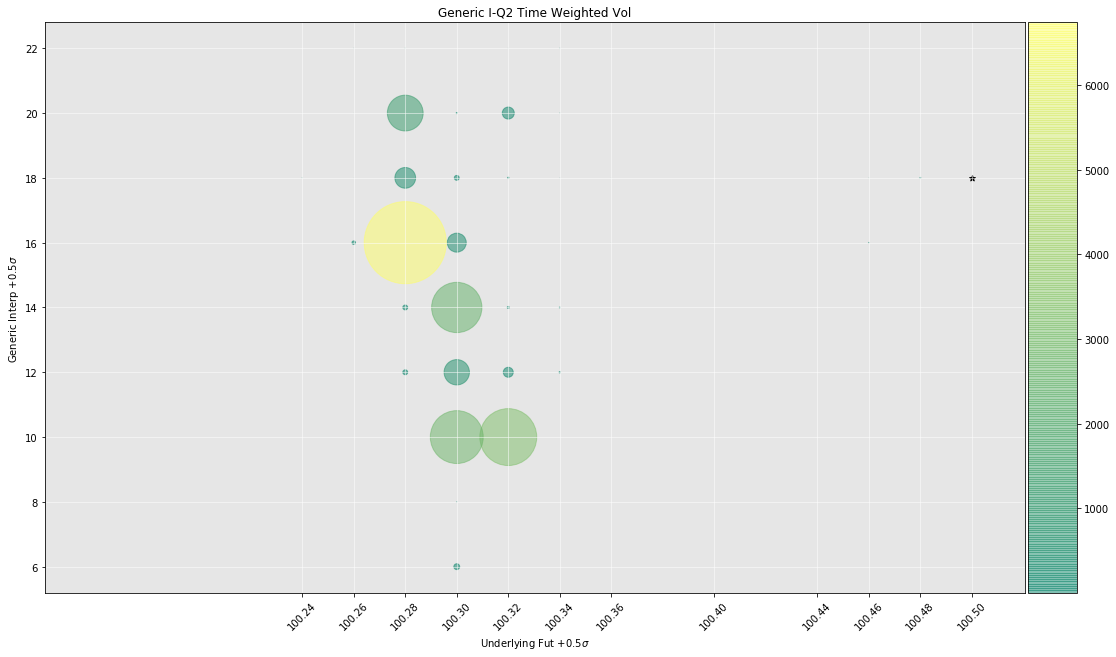

In [17]:
#Scatterplot
scat = Scatterplot(datamodel["p4"])
scat.figure.set_size_inches(18.5, 10.5)
display(scat.figure)

### K Q2

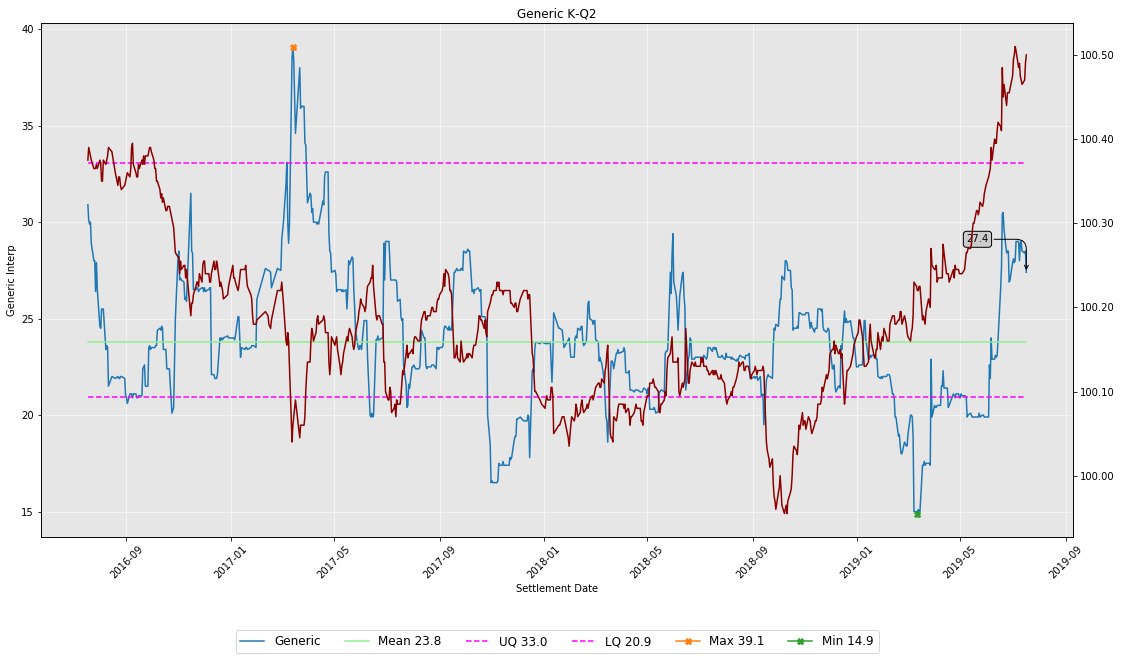

In [18]:
#Lineplot
line = Lineplot(datamodel["p5"])
line.figure.set_size_inches(18.5, 10.5)
display(line.figure)

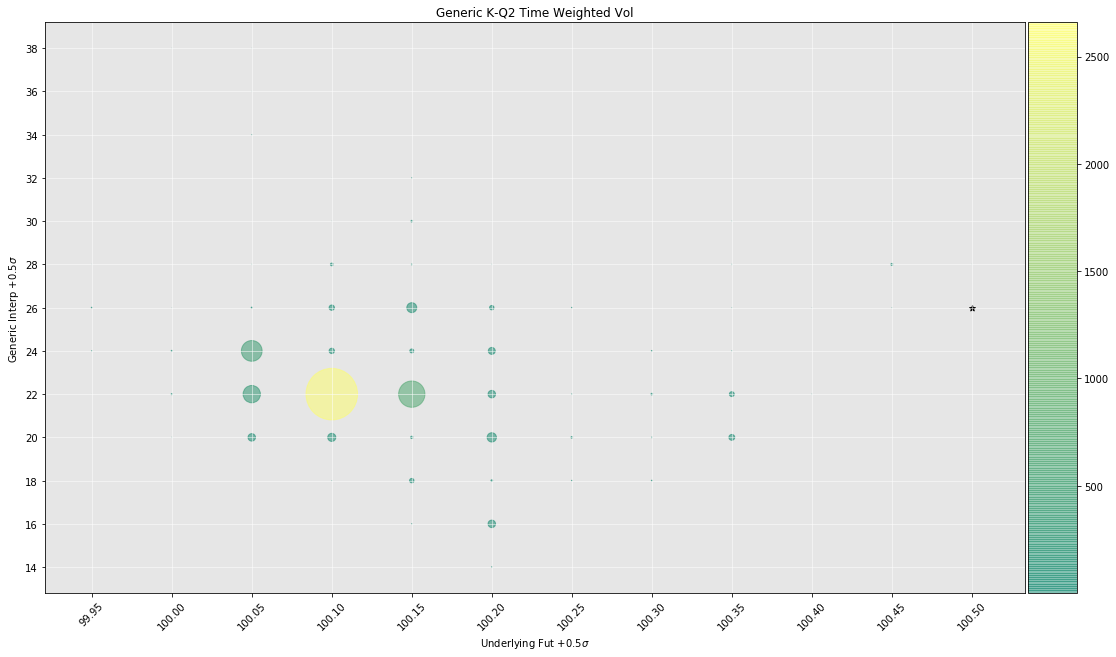

In [19]:
#Scatterplot
scat = Scatterplot(datamodel["p5"])
scat.figure.set_size_inches(18.5, 10.5)
display(scat.figure)

### K2 Q2

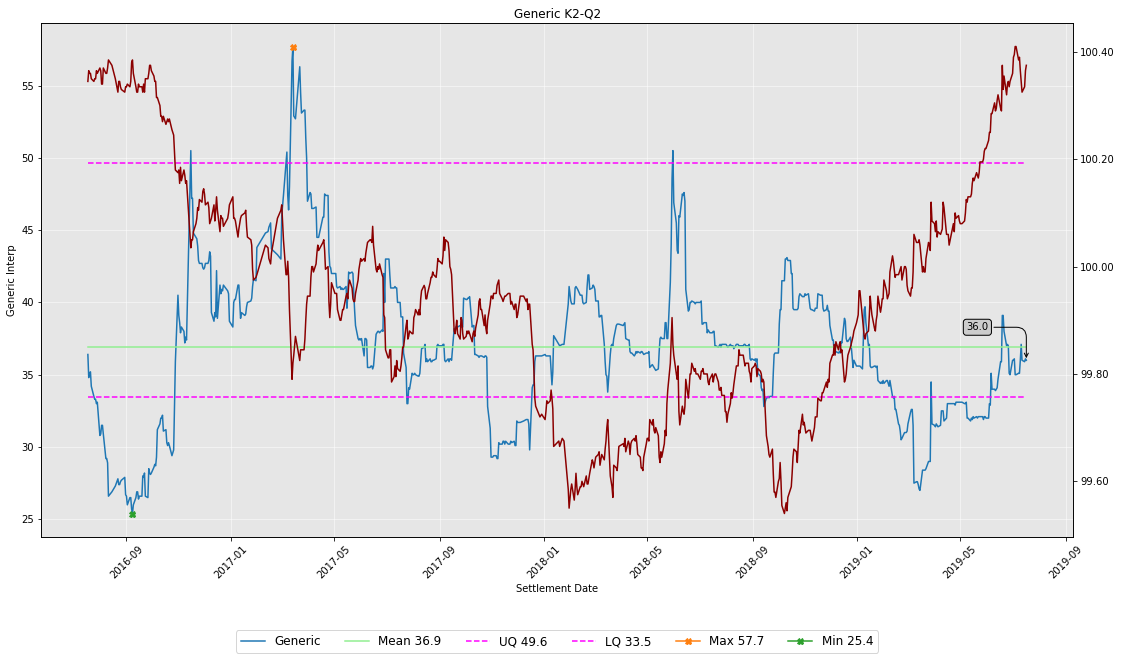

In [20]:
#Lineplot
line = Lineplot(datamodel["p6"])
line.figure.set_size_inches(18.5, 10.5)
display(line.figure)

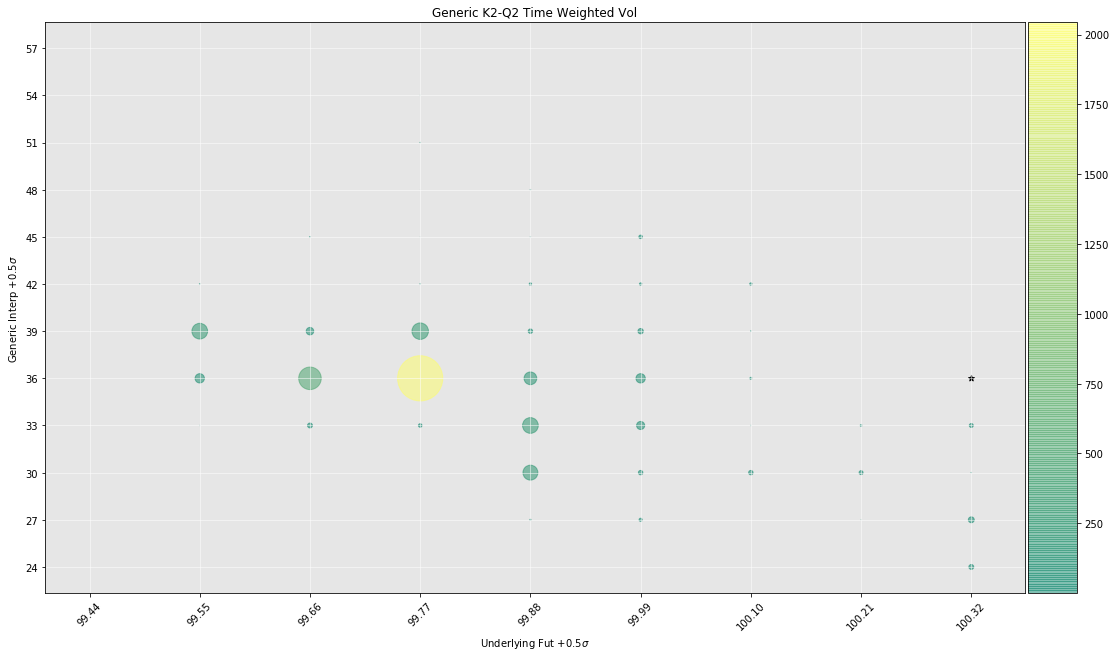

In [21]:
#Scatterplot
scat = Scatterplot(datamodel["p6"])
scat.figure.set_size_inches(18.5, 10.5)
display(scat.figure)

### K3 Q2

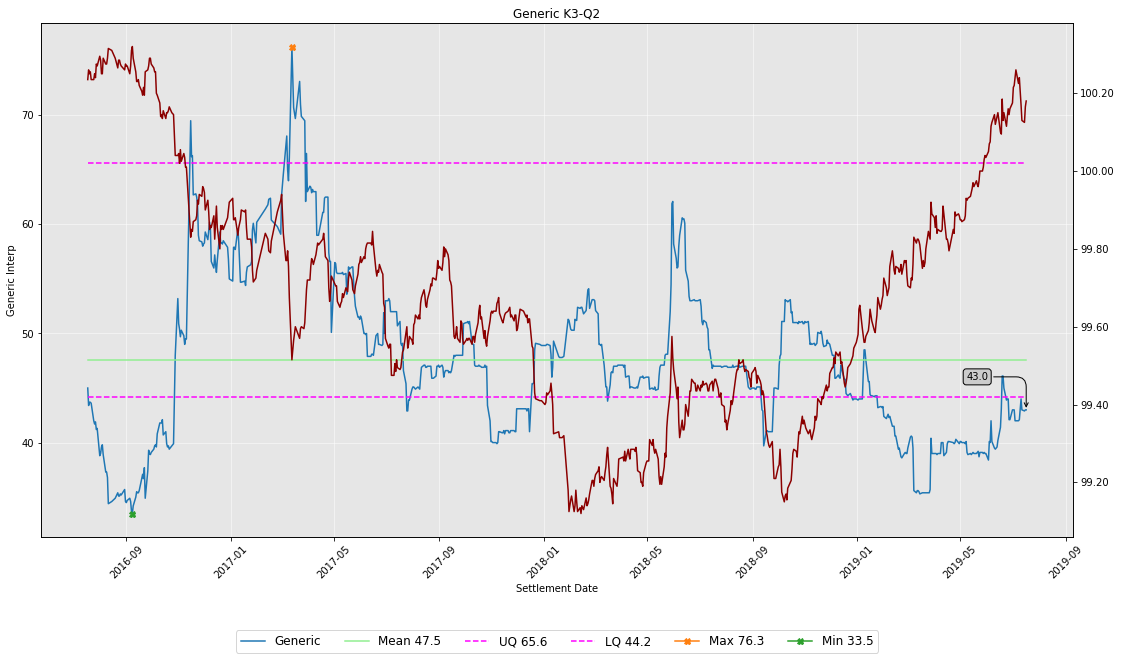

In [22]:
#Lineplot
line = Lineplot(datamodel["p7"])
line.figure.set_size_inches(18.5, 10.5)
display(line.figure)

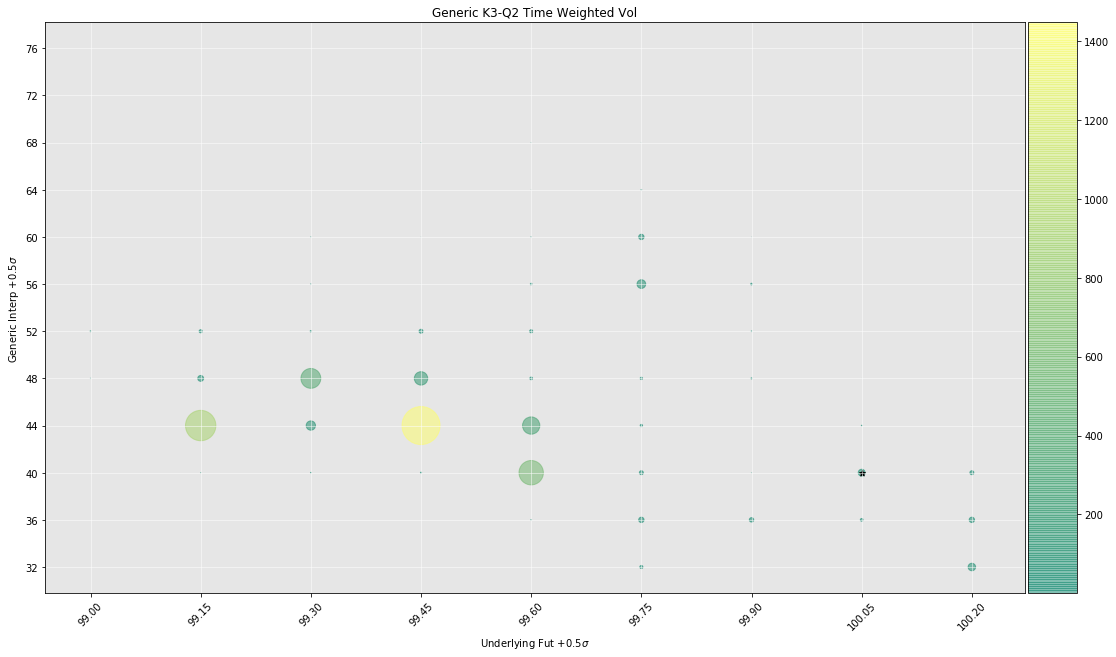

In [23]:
#Scatterplot
scat = Scatterplot(datamodel["p7"])
scat.figure.set_size_inches(18.5, 10.5)
display(scat.figure)

Copyright : 2019 Atlantic Trading London Ltd. All rights reserved.

Date of Creation : 17 July 2019

Author : Nilesh Ramnarain
